# Lesson 20: Eulerian and Hamiltonian graphs

## Overview

__Summary:__ In this lesson we examine the concept of _getting around in a graph_ in two particular kinds of ways. First we will think about whether we can traverse all the nodes in a graph without ever crossing the same edge twice (a so-called __Eulerian path__). Then we will think about whether we can traverse all the nodes in a graph without ever visiting the same _node_ twice (a so-called __Hamiltonian path__). In some graphs we can do one but not the other; in others we can do both; in others we can do neither. The goal of the lesson is to find some mathematical properties of graphs that will tell us when either one, or both, kinds of paths are possible. 

This lesson addresses the following learning targets: 

+ __GT.6:__ I can determine if a graph has an Eulerian path or circuit and whether it has a Hamiltonian path or circuit and give clear and appropriate reasoning for my decision. (If the path/circuit exists, find the path or circuit; if not, explain why.)

## Background

Graph theory was invented as a way of solving a specific problem about taking walks around the city of [Konigsberg](https://en.wikipedia.org/wiki/K%C3%B6nigsberg). This particular story involves the legendary mathematician [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (whose last name is pronounced "oiler") in the year 1736. 

In Konigsberg, the Pregel River ran through the city, and there were two large islands in the river. The islands were connected to each other and to the main part of the city via seven bridges, as shown in this map:

<img src="Konigsberg_bridges.png">

People in the city wondered __if it were possible to take a walk around the city and cross each bridge once, and only once.__ Here, for example, is a walk in the city that _doesn't_ work:

<img src="Konigsberg_bridges2.png">

If you start where it says "START" and follow the red path, you cross six of the seven bridges, and never cross the same one twice. But the path dumps you back into the "center" island area and there is no way to leave it without re-crossing one of the bridges you'd already walked across earlier. 

Try playing around with other paths around the city and see if you can cross each bridge once (that is, you can't skip a bridge!) but not twice. You can pick any starting point on the map you like. Can you find such a path? Try it, and then keep reading. 

---

So it looks as if this is impossible, because every path we try results in having to re-cross a bridge we've already covered. But just because we tried a bunch of examples and none of those specific examples worked, it doesn't mean that the task is impossible. We would need to _prove_ that it's impossible using an argument that doesn't depend on specific examples. Euler was the first person to _prove_ using mathematics that the answer to the "Konigsberg bridge problem" was a definitive _no_. How did he do it? 

Euler solved the Konigsberg bridge problem by realizing that the shape and size of the land masses were irrelevant to the problem; we can think of them abstractly just as points. What really mattered was the way that these points were connected by bridges. And the shape and size of the bridges doesn't matter either; we can think of the whole city for the purposes of this problem as just a bunch of points -- one for each land mass -- connected by line segments, one for each bridge. There are four land masses present in the city and several bridges. The resulting abstract diagram looks like this. See if you can identify which point corresponds to which land mass. 

<img src="Konigsberg_graph.png" height=300 width=300>

And with that, the concept of a _graph_ was born. Technically this is what we call a [multigraph](https://en.wikipedia.org/wiki/Multigraph), but the concept remains the same: We solve problems about connections between "things" by representing them abstractly as points and lines and examining the properties of the connections. That's graph theory. 

How Euler actually _used_ a graph to solve the Konigsberg bridge problem is something we will reveal in class time. For now, though, here is a new related problem. 

---

A doctor's office is divided up into a lobby area and 12 separate examination rooms, as shown in the floor plan below. The rooms are labelled, and the blue marks indicate a door between rooms. 

<img src="office_map.png" height=400 width=400>

At the end of the day, the custodian needs to go check each room and empty the trash. The most efficient way to do this is to start in the lobby and visit each room exactly once -- no room can be left out, otherwise the trash won't get collected; and no room should be visited twice because that would be a waste of time! Can it be done? 

Like Euler, we can recognize that certain aspects of the physical nature of this problem are irrelevant. For example, the size and shape of the rooms is unimportant. The location of the door is unimportant -- as long as we know that two rooms are connnected, that's the only thing that matters. So we can __abstract the floor plan into a graph__ in which each room is a node, and there is an edge between two nodes if the rooms are connected directly by a door. If we number the lobby with "0" and each of the examination rooms with 1 through 12, the resulting graph would look like this: 

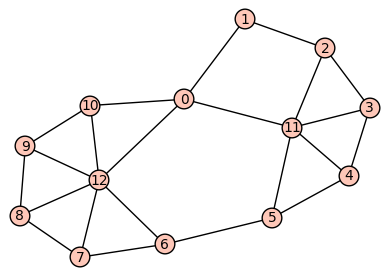

In [6]:
office = Graph({0:[1,10,11,12], 1:[0,2], 2:[1,3,11], 3:[2,4,11], 4:[3,5,11], 5:[4,6,11], 
               6:[5,7,12], 7:[6,8,12], 8:[7,9,12], 9:[8,10,12], 10:[0,9,12], 11:[0,2,3,4,5], 12:[0,6,7,8,9]})
office.show()

Now the question about the custodian is this: __Can we walk through this office complex and visit each NODE exactly once?__ We don't so much care if we visit an _edge_ more than once this time. So this is related to, but not the same thing as, the Kongisberg bridge problem. 

What do you think? Can this be done? Try it! 

---

It turns out that this is possible this time! Here is a circuit that starts and ends at the lobby, and visits each room exactly once: 

`(0,10,9,8,12,7,6,5,11,4,3,2,1,0)`

But it's hard to tell how to come up with such a circuit other than guess-and-check -- or even, in a general situation whether such a circuit should even exist. 

These kinds of problems that involve _visiting all the nodes in a graph without crossing the same edge twice_ (a.k.a. the Konigsberg bridge problem) _or without visiting the same node twice_ (the custodian problem) are very common in computer science and real-world applications: 

+ Can a snowplow plow all the streets in a subdivision without going over the same street twice? (If so, what's the route it should take?) 
+ Could a traveling salesman go on a tour of several cities and visit them all without having to visit the same city twice?
+ Can a packet of data be routed through a LAN and go through every server in the network exactly once? 

And so on. Since these are so common, we will now create some common terminology to speak of them. 

First, recall from [Lesson 14](http://nbviewer.jupyter.org/github/RobertTalbert/discretecs/blob/master/lessons/lesson14.ipynb) some terminology about traversing graphs: 

+ A __walk__ in a graph $G$ is a sequence of nodes in $G$, such that consecutive vertices are adjacent.
+ A __trail__ in a graph $G$ is a walk, with the additional condition that no edge is traversed more than once. 
+ A __circuit__ in a graph $G$ is a walk that begins and ends at the same node and has length at least 3. 

To put it all together, a circuit in a graph is a sequence of nodes in the graph such that consecutive nodes are adjacent, no edge is traversed more than once, the starting and ending node are the same, and there are at least 3 edges. 

We need this for the following definitions: 

>__Definition:__ A circuit $C$ in a graph $G$ is called an __Eulerian circuit__ if $C$ contains _every_ edge in $G$. A connected graph that contains an Eulerian circuit is called an __Eulerian graph__. 

Also: 

>__Definition:__ A trail in a graph $G$ is called an __Eulerian trail__ if it contains _every_ edge in $G$.

As an example, consider the following graph: 

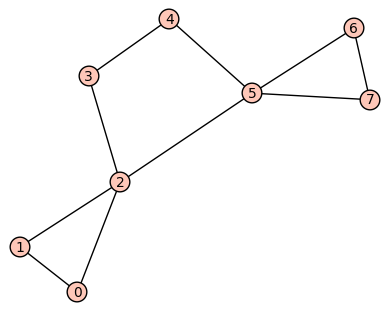

In [22]:
example1 = Graph({0:[1,2], 1:[0,2], 2:[0,1,3,5], 3:[2,4], 4:[3,5], 5:[2,4,6,7], 6:[5,7], 7:[5,6]})
example1.show()

This graph is Eulerian, because it contains an Eulerian circuit: `(0,1,2,3,4,5,7,6,5,2,0)`. 

Note that we repeated some _nodes_ in that circuit but that isn't important for whether or not the graph is Eulerian. 

On the other hand, this graph -- which is the graph above, minus the edge $\{2,5\}$ -- is _not_ Eulerian: 

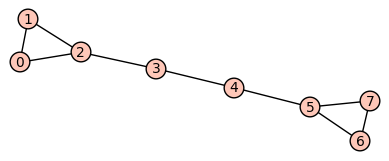

In [18]:
example1b = Graph({0:[1,2], 1:[0,2], 2:[0,1,3], 3:[2,4], 4:[3,5], 5:[4,6,7], 6:[5,7], 7:[5,6]})
example1b.show()

This is not Eulerian because there is no Eulerian circuit in the graph. _Why_ this is the case is something for you to think about for your homework. 

However, do note that although this graph is not Eulerian, it does have an Eulerian _trail_: `(2,0,1,2,3,4,5,7,6,5)`. Again this is an Eulerian trail because (1) it's a walk in which no edge is traversed more than once, and (2) every edge in the graph is traversed at least once (i.e. no edge is left out). 


That's the basic terminology for circuits and trails that traverse every _edge_ once. Here is terminology for the corresponding problem about nodes. First, here's one term that we learned again in Lesson 14: 

+ A __cycle__ in a graph is a circuit (that is, a walk that begins and ends at the same node and has length at least 3) with no repeated nodes (except the starting and ending node). 
+ A __path__ in a graph is a walk in which no nodes are repeated. 

With that, we can define:

>__Definition:__ A cycle $C$ in a graph $G$ is called a __Hamiltonian cycle__ if $C$ contains every node in $G$. A connected graph that contains a Hamiltonian cycle is called a __Hamiltonian graph__. 

Also: 

>__Definition:__ A path in a graph $G$ is called an __Hamiltonian path__ if it contains every node in $G$.

Hamiltonian cycles and paths are named after Irish mathematician [William Rowan Hamilton](https://en.wikipedia.org/wiki/William_Rowan_Hamilton) (1805--1865) who studied graphs with these kinds of circuits and trails in them. 

Questions you may have: 

+ Q: Why aren't we using the words "circuits" and "trails" here, like we did for Eulerian stuff? 
+ A: Because we are trying to describe walks in a graph that visit every node once, but no more than once. Every trail or circuit that could possibly be of interest to this question would have to be one in which no node is visited twice. Therefore there is no such thing as a "Hamiltonian trail" that is not automatically a Hamiltonian path, and likewise for circuits and cycles. 

Also, 

+ Q: How do you keep track in your mind of the definitions of these terms? 
+ A: The terms "trail", "path", "circuit" and "cycle" are probably just better memorized. To keep "Eulerian" separate from "Hamiltonian", just notice that the words "edge" and "Euler" both start with "e" -- so that can help you remember that "Eulerian" circuits and trails have to do with covering every _edge_ exactly once; therefore Hamiltonian paths and cycles have to do with covering every _node_ exactly once. 

For example, the office graph from earlier, as we said is Hamiltonian because it has a Hamiltonian cycle. Here it is, superimposed in red on the office graph: 

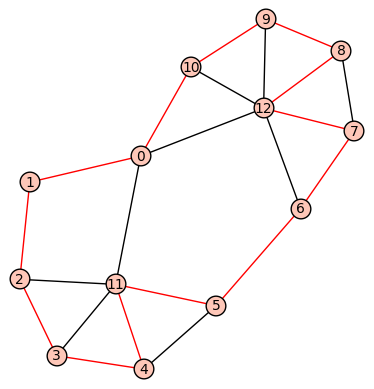

In [23]:
hc = [(0,10), (10,9), (9,8), (8,12), (12,7), (7,6), (6,5), (5,11), (11,4), (4,3), (3,2), (2,1), (1,0)]
office.show(edge_colors={'red':hc})

Note that this is _not_ an Eulerian circuit because several of the edges are not covered. In fact, as we will see in class, it turns out to be very easy to tell that this graph _cannot_ have either an Eulerian circuit or an Eulerian trail in it. 

On the other hand, here is a special graph that you can play with and convince yourself that it is _not_ Hamiltonian. It is called the _Petersen graph_. 

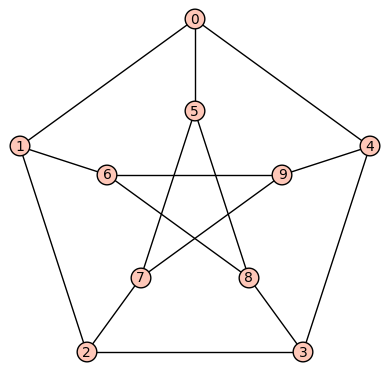

In [25]:
graphs.PetersenGraph().show()

Try to find a Hamiltonian cycle. Can you do it? Why or why not? What about a Hamiltonian _path_? 

--- 

__Where we are headed from here:__ In the homework for this lesson you'll play around with a few graphs to see which ones contain an Eulerian circuit, an Eulerian trail, a Hamiltonian cycle, and/or a Hamiltonian path. In class we'll debrief your results and ask a few follow-on questions: 

+ Is it easy to tell, just by looking at data from a graph, that it _must_ have an Eulerian circuit (or trail)? And then, how do we find that circuit (trail)? 
+ Likewise is it easy to tell, just by looking at data from a graph, that it _cannot have_ an Eulerian circuit (or trail)?
+ Is it easy to tell, just by looking at data from a graph, that it _must_ have a Hamiltonian cycle (or path)? And then, how do we find that cycle (path)? 
+ Likewise is it easy to tell, just by looking at data from a graph, that it _cannot have_ a Hamiltonian cycle (or path)?

## Preview Activities

Found here on Formative: https://goformative.com/student/#/assignments/ZPMU979 

This is due no later than one hour before your class session __on the day of the lesson__ rather than on the meeting prior to that lesson. This is noted on the class calendar as well. 

## Daily Homework

__Note:__ As we noted in Lesson 19, these Daily Homework questions will be used as group work questions you'll do "live" with your table groups when you arrive and will not be checked. The questions are still contained here in the lesson notes, and you are encouraged to work ahead on these to help your group and to give more time in class for deeper work. But they will not be checked. Instead, your Daily Homework score for this lesson will be entirely based on a Wrap-Up activity given on Formative at the end of class. 

1. Look back above at the graph labeled `example1b`. It was claimed that this graph is not Eulerian. This means that the graph does not contain an Eulerian circuit. Why doesn't it? Can you explain why? Also: Does this graph have an Eulerian _trail_? Does it have a Hamiltonian cycle? Does it have a Hamiltonian path? 
2. Try to find a Hamiltonian cycle in the Petersen graph (above). Also try to find a Hamiltonian path. If you succeed, write down the cycle and/or path as a list of nodes. If you feel like it is impossible to do so, then explain why. 
3. Consider the wheel graphs $W_3, W_4, W_5, \dots, W_9$. Which of these is Eulerian? Which of these is Hamiltonian? (Hint: See some helpful Sage methods in the Appendix below.) Using your data, make a conjecture about when the wheel graph $W_n$ will be Eulerian and when it will be Hamiltonian. 

## Appendix: Helpful Sage methods for Eulerian and Hamiltonian graphs

Here are some Sage methods that can help you study these concepts: 
    
    .is_eulerian()   # Returns True if the graph is Eulerian, False otherwise
    .eulerian_circuit() # Returns an Eulerian circuit in the graph as an edge list if the graph is Eulerian
    .is_hamiltonian()   # Returns True if the graph is Hamiltonian, False otherwise 
    .hamiltonian_cycle() # Returns a Hamiltonian cycle in the graph, as a graph object, if the graph is Hamiltonian
    
Here are some examples of these four methods in action. 

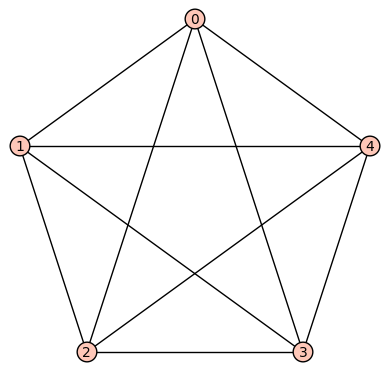

In [2]:
k5 = graphs.CompleteGraph(5)   # Creates the complete graph on five nodes 
k5.show()

In [3]:
k5.is_eulerian()   # Is K_5 Eulerian?

True

In [4]:
# OK then, what's an Eulerian circuit in this graph? 
k5.eulerian_circuit()

[(0, 4, None),
 (4, 3, None),
 (3, 2, None),
 (2, 4, None),
 (4, 1, None),
 (1, 3, None),
 (3, 0, None),
 (0, 2, None),
 (2, 1, None),
 (1, 0, None)]

In [5]:
# If you don't like the edge weights:
k5.eulerian_circuit(labels=False)

[(0, 4),
 (4, 3),
 (3, 2),
 (2, 4),
 (4, 1),
 (1, 3),
 (3, 0),
 (0, 2),
 (2, 1),
 (1, 0)]

In [6]:
# On the other hand, K_6 is _not_ Eulerian:
k6 = graphs.CompleteGraph(6)
k6.is_eulerian()

False

In [7]:
# What about Hamiltonian? 
k5.is_hamiltonian()

True

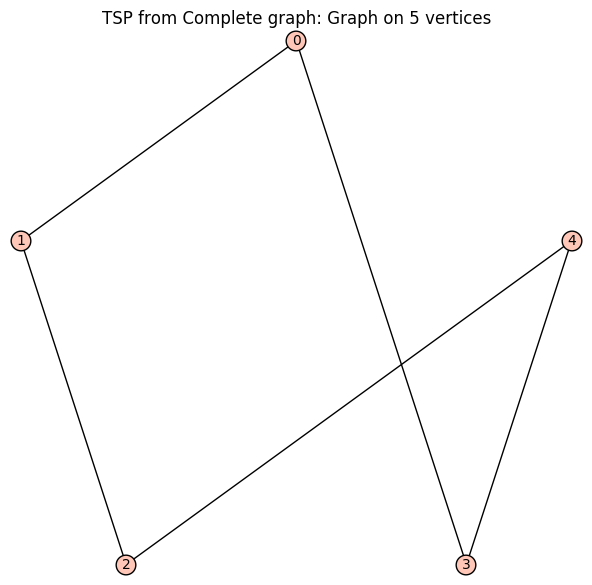

In [8]:
# The Hamiltonian cycle is pretty easy to identify: 
k5.hamiltonian_cycle()

"TSP" is the name of the algrorithm that Sage uses to find the Hamiltonian cycle. It's an abbreviation for [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem) which is one of the fundamental problems in computer science -- we will have more to say about this, and you are encouraged to click the link and read up on this. 

Note that Sage returns a different data type for `.hamiltonian_cycle()` than it does for `.eulerian_circuit()`. The `.eulerian_circuit()` method returns a __list__. The `.hamiltonian_cycle()` returns a __Graph object__. 

However, it's easy to take one more step and turn the Hamiltonian cycle into a list too: 

In [10]:
k5.hamiltonian_cycle().edges(labels=False)

[(0, 1), (0, 3), (1, 2), (2, 4), (3, 4)]

Once you have the edge list, you can superimpose it onto the graph itself using this syntax: 

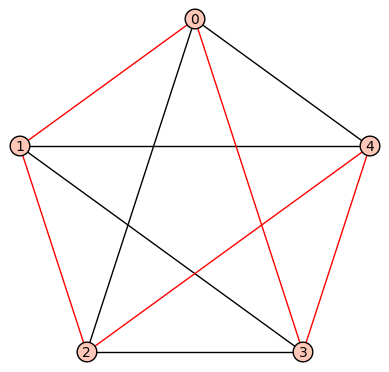

In [12]:
hc = k5.hamiltonian_cycle().edges(labels=False)    # Assign the edge list to a variable
k5.show(edge_colors={'red':hc}) # Pass the edge_colors parameter, whose value is a dictionary that assigns a color to a list. 

We could also superimpose an Eulerian circuit onto a graph, but it's not very exciting to do so. Why? 

For further exploration, see if you can get Sage to tell you whether an Eulerian _trail_ or a Hamiltonian _path_ exists in a graph, and then to give you that trail or path if it exists. 